In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


from statsmodels.tsa.stattools import adfuller

In [105]:
df = pd.read_csv('./data/Nvidia_stock_price_history.csv')

In [106]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.507891,67867200
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.665861,12762000
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.536613,8580000
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.531826,6109200
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.527039,5688000
...,...,...,...,...,...,...,...
5624,2021-05-28,620.039978,651.099976,620.039978,649.780029,649.780029,16113400
5625,2021-06-01,650.799988,655.530029,636.130005,650.580017,650.580017,11820100
5626,2021-06-02,650.090027,676.750000,649.419983,671.130005,671.130005,14854200
5627,2021-06-03,668.030029,690.359985,663.320007,678.789978,678.789978,14500200


In [107]:
df['daily_change'] = (df.Close - df.Open) / df.Open * 100

In [108]:
df['Date'] = pd.to_datetime(df['Date'])

In [109]:
df = df[df.Date >= '2015-01-01']

In [110]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,daily_change
4012,2015-01-02,20.129999,20.280001,19.809999,20.129999,19.368101,2842000,0.000000
4013,2015-01-05,20.129999,20.190001,19.700001,19.790001,19.040976,4948800,-1.689012
4014,2015-01-06,19.820000,19.840000,19.170000,19.190001,18.463682,4944100,-3.178602
4015,2015-01-07,19.330000,19.500000,19.080000,19.139999,18.415575,8045200,-0.982933
4016,2015-01-08,19.360001,19.980000,19.350000,19.860001,19.108328,7094500,2.582644
...,...,...,...,...,...,...,...,...
5624,2021-05-28,620.039978,651.099976,620.039978,649.780029,649.780029,16113400,4.796473
5625,2021-06-01,650.799988,655.530029,636.130005,650.580017,650.580017,11820100,-0.033800
5626,2021-06-02,650.090027,676.750000,649.419983,671.130005,671.130005,14854200,3.236471
5627,2021-06-03,668.030029,690.359985,663.320007,678.789978,678.789978,14500200,1.610698


<AxesSubplot:xlabel='daily_change', ylabel='Volume'>

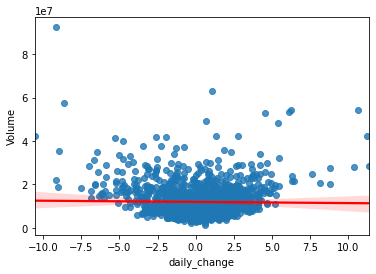

In [111]:
sns.regplot(x=df.daily_change, y=df.Volume, line_kws={"color": "red"})

In [120]:
df[df.daily_change >= 6]

,Open,High,Low,Close,Adj Close,Volume,daily_change
Date,,,,,,,
2016-11-11,79.510002,88.769997,78.500000,87.970001,86.741577,54383600,10.640170
2016-12-29,104.900002,111.489998,102.800003,111.430000,110.038460,54384200,6.224974
2017-05-10,114.290001,121.820000,114.019997,121.290001,119.926491,53227400,6.124770
2018-02-06,204.399994,225.699997,204.000000,225.580002,223.630890,27870000,10.362039
2018-10-25,195.470001,209.750000,193.679993,207.839996,206.412537,23793000,6.328334
2018-10-30,186.550003,203.399994,185.619995,203.000000,201.605789,20179800,8.818010
2018-11-20,134.059998,154.259995,133.309998,149.080002,148.056122,42300800,11.203942
2019-03-11,151.589996,162.059998,149.690002,161.139999,160.358490,21493200,6.299890
2020-02-28,242.460007,272.459991,241.789993,270.070007,269.693268,28331300,11.387445


In [113]:
df.set_index('Date', inplace = True)

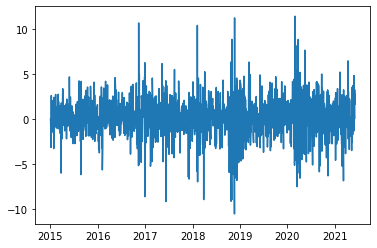

In [114]:
plt.plot(df['daily_change'])

In [115]:
monthly = df.resample('MS').mean()

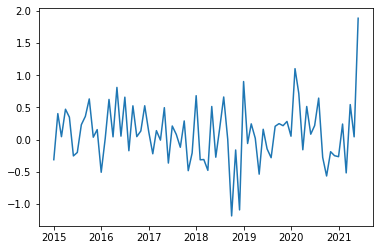

In [116]:
plt.plot(monthly['daily_change'])

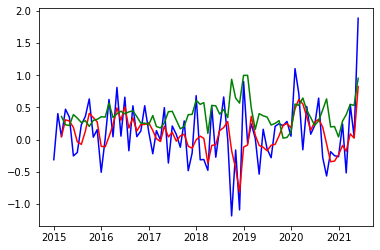

In [117]:
roll_mean = monthly['daily_change'].rolling(window = 3).mean()
roll_std = monthly['daily_change'].rolling(window = 3).std()
plt.plot(monthly['daily_change'], color = 'blue')
plt.plot(roll_mean, color = 'red')
plt.plot(roll_std, color = 'green')

In [119]:
test = adfuller(df['daily_change'])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

Test Statistic                -1.218587e+01
p-value                        1.319206e-22
#Lags Used                     1.100000e+01
Number of Observations Used    1.605000e+03
dtype: float64
